[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.36875420e+25 4.11190494e+24 2.31001759e+24 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.73226428e+25 5.78595506e+23 5.77084248e+23 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.20440831e+25 1.15392693e+24 5.76969937e+23 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.36875420e+25 4.11190494e+24 2.31001759e+24 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]

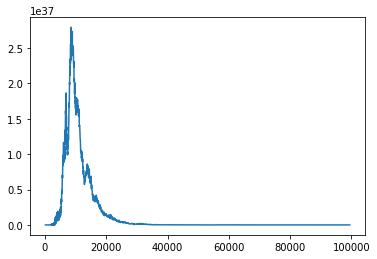

In [19]:
import h5py
import numpy as np
import bisect
import matplotlib.pyplot as plt 

# open model file
name = '/Users/mwiesner/Kasen_Kilonova_Models_2017/kilonova_models/knova_d1_n10_m0.020_vk0.10_Xlan1e-3.0.h5'
fin    = h5py.File(name,'r')

# frequency in Hz
nu    = np.array(fin['nu'],dtype='d')

# array of time in seconds
times = np.array(fin['time'])
# covert time to days
times = times/3600.0/24.0

# specific luminosity (ergs/s/Hz) 
# this is a 2D array, Lnu[times][nu]
Lnu_all   = np.array(fin['Lnu'],dtype='d')

# for example, get the spectrum at day 2.0
t = 2.0
# index corresponding to t
it = bisect.bisect(times,t)
# spectrum at this epoch
Lnu = Lnu_all[it,:]

# if you want thing in Flambda (ergs/s/Angstrom)
c    = 2.99e10
lam  = c/nu*1e8
Llam = Lnu*nu**2.0/c/1e8

#plot it up
plt.plot(lam,Llam)
plt.ion()
plt.show()
#j = raw_input('press any key to exit>')